In [1]:

# heatmap plot

import pandas as pd
import numpy as np

from pathlib import Path

In [2]:
phosphorylation_scores_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT/protein_results/protein_scores.tsv'
#phospho_measure_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT/phospho_measures_z.tsv'
sample_annotation_path = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Searches/patient_annotation_paper_cohort_230626_final.csv"

In [3]:
patients_list = [
'H021-YHPFMB-T2',
'H021-XHP589-M2-R2',
'H021-TPPC3H-M2-Q1',
'H021-UA4J9Y-T1',
'H021-PHLFH6-M4-R2',
'H021-3GHH6S-T1',
'H021-DTSDEX-M6',
'H021-8Z72-T4',
'H021-3GHH6S-T1-R2',
'H021-ENGUHR-T2',
'H021-2A3P6Y-M3-E1',
'H021-TPPC3H-M3'
                ]
meta_data_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/Metadata_Papercohort_230801.xlsx'
meta_data = pd.read_excel(meta_data_path)
meta = meta_data[meta_data['Sample name'].isin(patients_list)][['Sample name', 'Paper_pseudo_identifier']].set_index('Sample name').to_dict()['Paper_pseudo_identifier']

In [8]:
ps_scores = pd.read_csv(phosphorylation_scores_path,sep='\t')
ps_scores = ps_scores.set_index('Gene names')
#phospho_measure = pd.read_csv(phospho_measure_path,sep='\t')

In [13]:
overlapping = [x for x in ps_scores.columns.to_list() if x in patients_list]

In [15]:
proteins = ['EGFR',
'ERBB2',
'ERBB3',
'FGFR1',
'FGFR4',
'FGFR3;FGFR2',
'FLT1',
'KDR',
'FLT4',
'PDGFRA;FLT3',
'PDGFRB',
'AXL',
'ALK',
'DDR1',
'DDR2',
'KIT',
'RET',
'NTRK2',
'NTRK3',
'IGF1R;INSRR',
'MET',
'MERTK',
'EPHB2',
'EPHA2',
'EPHA7;EPHA10',
'EPHB3',
'EPHA4',
'EPHA5',
'EPHB4',
'EPHA3',
'EFNB2',
'ABL1',
'ABL2',
'PTK2',
'JAK1',
'JAK2',
'JAK3',
'SRC',
'YES1',
'CSK;MATK',
'FGR',
'FYN',
'LYN',
'LCK',
'PLK1',
'AURKB;AURKC',
'AURKA'
]

In [14]:

df = ps_scores[overlapping]

In [16]:
df = df[df.index.isin(proteins)]

In [18]:
min_df = df.min().min()
max_df = df.max().max()

In [21]:
df = df.fillna(-4.2)

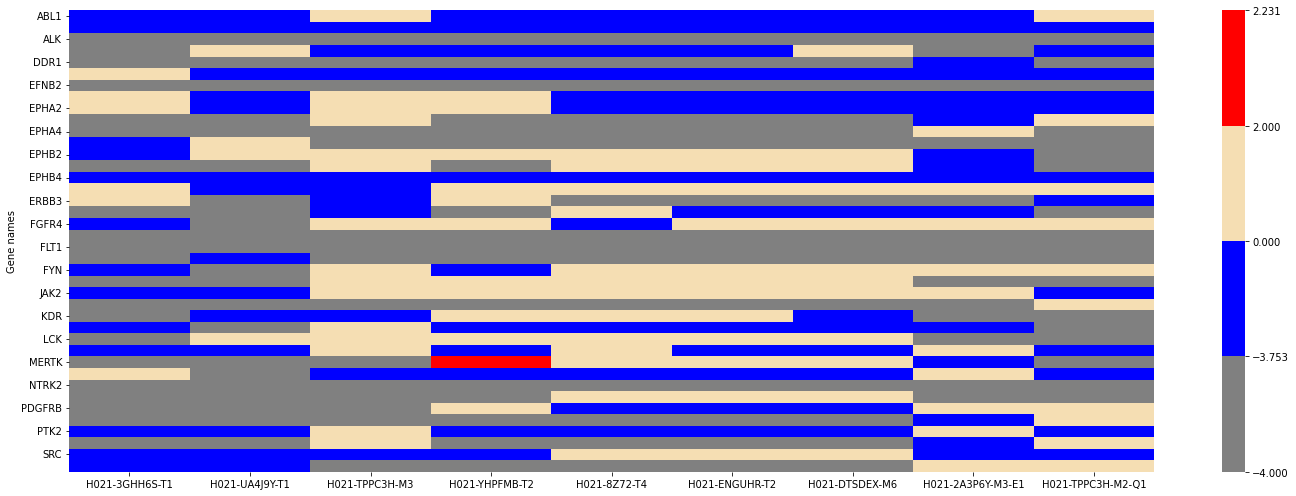

In [22]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True
cmap = colors.ListedColormap(['grey','blue','wheat','red'])
bounds = [-4,min_df,0,2,max_df]
norm = colors.BoundaryNorm(bounds,cmap.N)
# plot heatmap
sns.heatmap(df,cmap=cmap,norm=norm)

plt.savefig('/home/amir/Desktop/phosphoscores.svg')
plt.show()